In [13]:
# Cell 1: Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA


In [14]:
# Cell 2: Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display the first few rows of the dataset
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [15]:
# Select features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split successful!")


Train-test split successful!


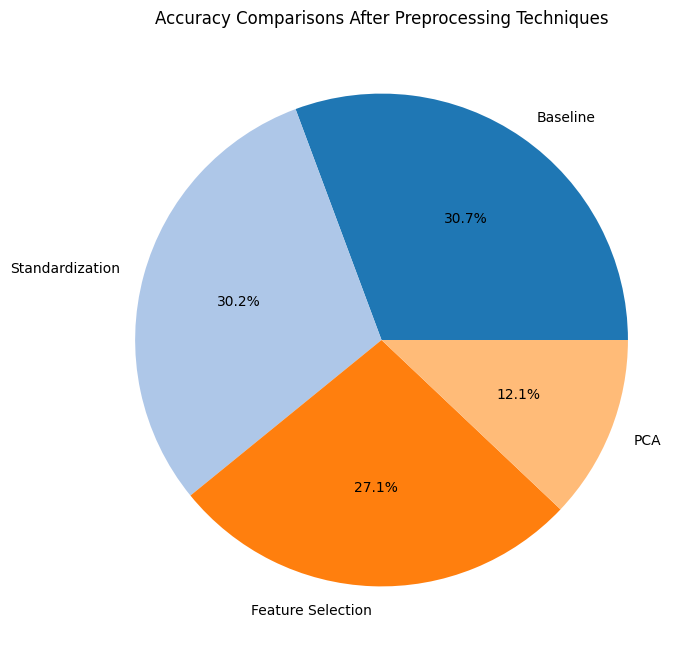

,Technique,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.244327,0.560964,0.121615,0.126392
1,Standardization,0.240545,0.576191,0.113447,0.117401
2,Feature Selection,0.215582,0.405183,0.174500,0.111540
3,PCA,0.096067,0.318676,0.130533,0.036690


In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Select features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), 
                          columns=encoder.get_feature_names_out(categorical_features))
X_encoded = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Placeholder for accuracy comparisons
accuracies = {}

# Baseline Random Forest without preprocessing
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)
accuracies['Baseline'] = accuracy_score(y_test, y_pred_baseline)

# Standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

rf_standardized = RandomForestClassifier(random_state=42)
rf_standardized.fit(X_train_standardized, y_train)
y_pred_standardized = rf_standardized.predict(X_test_standardized)
accuracies['Standardization'] = accuracy_score(y_test, y_pred_standardized)

# Feature Selection
X_train_selected = SelectKBest(f_classif, k=5).fit_transform(X_train_standardized, y_train)
X_test_selected = SelectKBest(f_classif, k=5).fit_transform(X_test_standardized, y_test)

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
accuracies['Feature Selection'] = accuracy_score(y_test, y_pred_selected)

# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
accuracies['PCA'] = accuracy_score(y_test, y_pred_pca)

# Plot Pie Chart for Accuracy Comparisons
plt.figure(figsize=(8, 8))
plt.pie(accuracies.values(), labels=accuracies.keys(), autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title("Accuracy Comparisons After Preprocessing Techniques")
plt.show()

# Compute evaluation metrics
metrics_data = {
    'Technique': ['Baseline', 'Standardization', 'Feature Selection', 'PCA'],
    'Accuracy': [accuracies['Baseline'], accuracies['Standardization'], accuracies['Feature Selection'], accuracies['PCA']],
    'Precision': [
        precision_score(y_test, y_pred_baseline, average='macro', zero_division=1),
        precision_score(y_test, y_pred_standardized, average='macro', zero_division=1),
        precision_score(y_test, y_pred_selected, average='macro', zero_division=1),
        precision_score(y_test, y_pred_pca, average='macro', zero_division=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_baseline, average='macro', zero_division=1),
        recall_score(y_test, y_pred_standardized, average='macro', zero_division=1),
        recall_score(y_test, y_pred_selected, average='macro', zero_division=1),
        recall_score(y_test, y_pred_pca, average='macro', zero_division=1)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_baseline, average='macro', zero_division=1),
        f1_score(y_test, y_pred_standardized, average='macro', zero_division=1),
        f1_score(y_test, y_pred_selected, average='macro', zero_division=1),
        f1_score(y_test, y_pred_pca, average='macro', zero_division=1)
    ]
}

# Display table of metrics
metrics_df = pd.DataFrame(metrics_data)
metrics_df